Utilizar os dados dos emprestimos de livros para identificar a quais cursos pertencem os alunos que mais utilizam do serviço de emprestimo da biblioteca

### Análises atuais:
 * Cursos com mais emprestimos cadastrados (por nível do curso)
 * Número de emprestimos por ano ()
 * Tempo dos emprestimos (e algumas estatisticas)
 * 

In [228]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Lendo os dados dos emprestimos
Dados_Emprestimos = glob("Dados_Abertos/Dados_Emprestimos/*.csv")
emprestimos = [pd.read_csv(f, sep=';') for f in sorted(Dados_Emprestimos)]

['Dados_Abertos/Dados_Emprestimos/emprestimos-20161.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20031.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20151.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20061.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20171.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20121.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20042.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20131.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20062.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20172.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20141.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20071.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20051.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20122.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20162.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20142.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20102.csv',
 'Dados_Aberto

In [3]:
# Lendo os dados do acervo da biblioteca
Dados_Discentes = glob("Dados_Abertos/Dados_Discentes/*.csv")
discentes = [pd.read_csv(f, sep=';') for f in sorted(Dados_Discentes)]

['Dados_Abertos/Dados_Discentes/discentes-2019.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2018.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2013.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2010.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2014.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2016.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2017.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2011.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2009.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2015.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2012.csv']

In [4]:
# Lendo os dados dos discentes
acervo = pd.read_csv("Dados_Abertos/Dados_Biblioteca/acervo.csv", sep=';')
exemplares = pd.read_csv("Dados_Abertos/Dados_Biblioteca/exemplares.csv", sep=';')
exemplares_acervo = pd.read_csv("Dados_Abertos/Dados_Biblioteca/exemplares-acervo.csv", sep=';')

In [5]:
# Adicionando coluna 'ano' aos datasets 
so = sorted(Dados_Emprestimos)
for r in range(len(so)):
    emprestimos[r]['ano'] = int(so[r][-9:-5])
    
anos = []
for r in range(len(so)):
    anos.append(int(so[r][-9:-5]))

In [6]:
# Concatenando os datasets obtidos
emprestimos_all = pd.concat(emprestimos, ignore_index=True)
discentes_all = pd.concat(discentes, ignore_index=True)

# Filtrando dados a serem considerados
emprestimos_all = emprestimos_all[emprestimos_all.nome_usuario != "Usuário de Migração"]
discentes_curso = discentes_all[['nome_discente','ano_ingresso','nome_curso', 'nivel_ensino']]
discentes_curso = discentes_curso.set_index(['nome_discente','ano_ingresso'])

In [7]:
# Obtendo o numero de emprestimos de cada usuario por ano
usuarios = emprestimos_all.groupby(['nome_usuario','ano'])['id_emprestimo'].count()
# Limpando o nome de dois usuarios
usuarios.index = usuarios.index.set_levels(usuarios.index.unique(level=0).str.replace('\t', ''), level=0)
usuarios = usuarios.sort_index()
# Melhorando a Visualização
usuarios = pd.DataFrame(usuarios)
usuarios.columns = ['emprestimos']

In [8]:
# Preparando para o Merge
discentes_curso.index.levels[0].name = "nome"
discentes_curso.index.levels[1].name = "ano"
usuarios.index.levels[0].name = "nome"
usuarios.index.levels[1].name = "ano"

In [9]:
emprestimos_curso = pd.merge(discentes_curso, usuarios, left_index=True, right_index=True)

In [10]:
# Organizando por nivel de ensino
niveis_ensino = emprestimos_curso.nivel_ensino.unique()
emprestimos_curso_niveis = {nivel: emprestimos_curso[emprestimos_curso.nivel_ensino == nivel] for nivel in niveis_ensino}
emprestimos_curso_niveis = {nivel: pd.DataFrame(emprestimos_curso_niveis[nivel].groupby(['nome_curso'])['emprestimos'].sum()).sort_values(by='emprestimos', ascending=False) for nivel in niveis_ensino}
niveis_ensino

array(['GRADUAÇÃO', 'TÉCNICO', 'MESTRADO', 'DOUTORADO', 'LATO SENSU',
       'FORMAÇÃO COMPLEMENTAR', 'RESIDÊNCIA', 'TÉCNICO INTEGRADO',
       'FUNDAMENTAL', 'INFANTIL', 'MÉDIO'], dtype=object)

In [11]:
def normalize(df, t=""):
    if(t == "MinMax"):
        return (df-df.min())/(df.max()-df.min())
    elif (t == "Mean"):
        return (df-df.mean())/df.std()
    else:
        return df

emprestimos_curso_niveis = {nivel: normalize(emprestimos_curso_niveis[nivel]) for nivel in niveis_ensino}

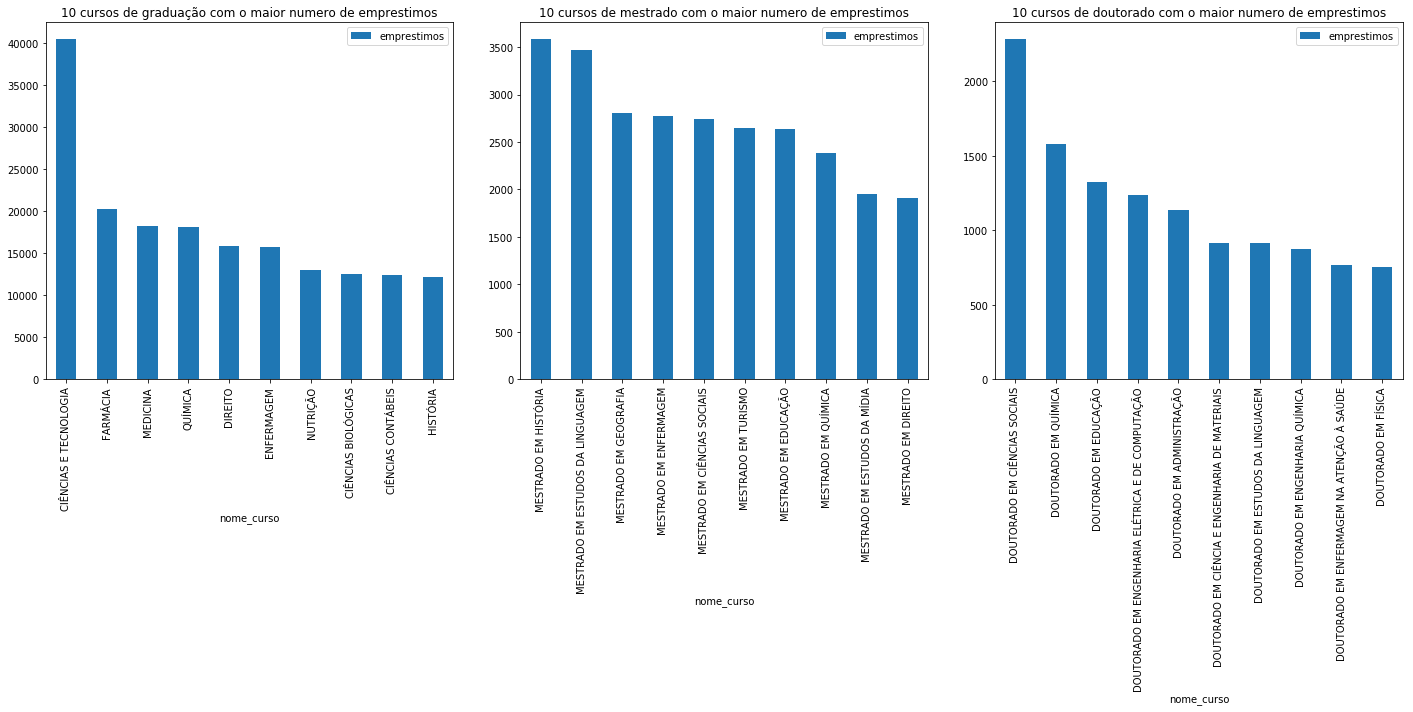

In [12]:
# Preparando Gráficos para os niveis comuns de ensino
niveis_ensino_padrao = ["GRADUAÇÃO", "MESTRADO", "DOUTORADO"]

fig, axes = plt.subplots(figsize=(20, 10),nrows=1, ncols=3)

generic_title = "10 cursos de %s com o maior numero de emprestimos"

for i in range(len(niveis_ensino_padrao)):
    emprestimos_curso_niveis[niveis_ensino_padrao[i]].head(10).plot.bar(title=generic_title % niveis_ensino_padrao[i].lower(), ax=axes[i])

plt.tight_layout()
plt.show()

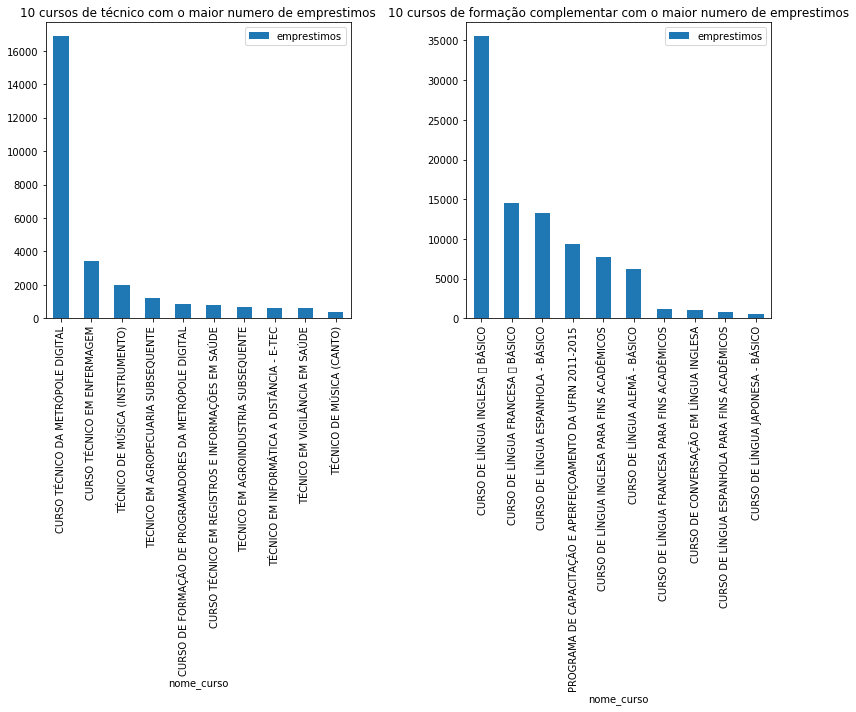

In [13]:
# Preparando Gráficos para os outros niveis de ensino
niveis_ensino_outros = ["TÉCNICO","FORMAÇÃO COMPLEMENTAR"]

fig, axes = plt.subplots(figsize=(12, 10),nrows=1, ncols=2)

for i in range(len(niveis_ensino_outros)):
    emprestimos_curso_niveis[niveis_ensino_outros[i]].head(10).plot.bar(title=generic_title % niveis_ensino_outros[i].lower(), ax=axes[i])
    
plt.tight_layout()
plt.show()

In [14]:
# Contabilizando numero de emprestimos por ano
emprestimos_ano = emprestimos_all.groupby(["ano"])["id_emprestimo"].count()
emprestimos_ano = pd.DataFrame(emprestimos_ano)

In [83]:
emprestimos_ano.columns = ["Emprestimos"]

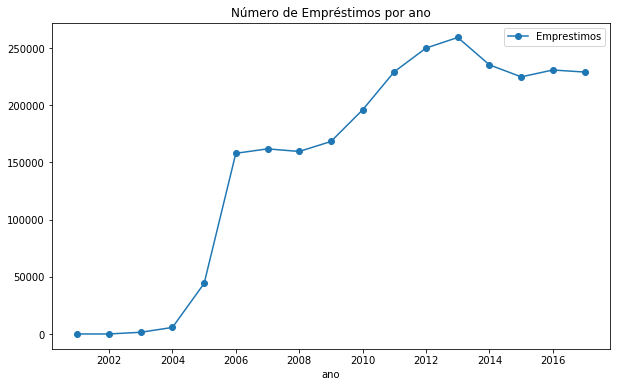

In [227]:
#sns.relplot(kind="line", data=emprestimos_ano["Emprestimos"])
emprestimos_ano.plot(kind='line', title="Número de Empréstimos por ano", legend=True, figsize=(10,6), style=["o-"])

In [16]:
emprestimos_all.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'nome_usuario', 'id_vinculo_usuario',
       'tipo_vinculo_usuario', 'ano'],
      dtype='object')

In [17]:
codigos_livros_emprestados = emprestimos_all.codigo_barras.value_counts()
codigos_livros_emprestados = pd.DataFrame(codigos_livros_emprestados)
codigos_livros_emprestados = codigos_livros_emprestados.reset_index()
codigos_livros_emprestados.columns = ["codigo_barras", "count"]

In [18]:
bib_ex = exemplares[["registro_sistema", "codigo_barras", "localizacao"]]
exe_acer = exemplares_acervo[["registro_sistema", "titulo", "sub_titulo", "assunto", "autor", "isbn"]]

In [19]:
biblio_merged = pd.merge(bib_ex, exe_acer, on="registro_sistema", how='outer')

In [20]:
biblio_merged = biblio_merged.drop_duplicates(subset="codigo_barras")

In [21]:
biblio_merged_counted = pd.merge(codigos_livros_emprestados, biblio_merged, on="codigo_barras")

In [22]:
droped = biblio_merged_counted.dropna(subset=['assunto'])

In [23]:
calculo = droped[droped.assunto.str.contains("alculo")]

In [24]:
calculo

,codigo_barras,count,registro_sistema,localizacao,titulo,sub_titulo,assunto,autor,isbn
2508,2006019229,69,76545,517.2/.3 R571c v.2,Cálculo diferencial e integral /,NaN,Cálculo diferencial.#$&Calculo integral.,"Righetto, Armando,",NaN
3354,2009038171,64,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
4041,2013011033,61,190274,514.12 W784v,Vetores e geometria analítica /,NaN,Geometria analítica.#$&Calculo vetorial.#$&Álg...,"Winterle, Paulo",9788534611091 (broch.)
4328,2009040689,60,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
4760,2009040684,58,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6286,2006018670,53,75677,517.2/.3 R571c 2.ed.,Cálculo diferencial e integral /,NaN,Cálculo diferencial.#$&Calculo integral.,"Righetto, Armando,",NaN
6377,2009040674,53,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6655,2009040688,52,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6674,2009040678,52,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6742,2013011034,52,190274,514.12 W784v,Vetores e geometria analítica /,NaN,Geometria analítica.#$&Calculo vetorial.#$&Álg...,"Winterle, Paulo",9788534611091 (broch.)


In [25]:
emprestimos_simples = emprestimos_all[['codigo_barras', 'data_emprestimo','data_devolucao', 'nome_usuario']]

In [26]:
emprestimos_simples.head()

,codigo_barras,data_emprestimo,data_devolucao,nome_usuario
26,L129432,2001-06-11 12:01:00,2014-05-06 16:53:45,ANNA KARINNA CAVALCANTE DA SILVA
249,L106353,2002-10-18 12:01:00,2015-10-27 17:41:30,SIMONE SUELI NOBRE DA SILVA
298,L156111,2003-04-02 12:01:00,2015-10-27 17:43:20,LUCIANA APARECIDA COSME SOARES
299,L155829,2003-04-02 12:01:00,2015-10-27 17:43:39,LUCIANA APARECIDA COSME SOARES
498,O005923,2003-09-22 17:44:00,2003-09-22 17:44:00,WELLINGTON RODRIGUES DA SILVA


In [27]:
emprestimos_reg_sistema = pd.merge(emprestimos_simples, bib_ex, on="codigo_barras", how='inner')

In [134]:
emprestimos_reg_sistema_sorted = emprestimos_reg_sistema.sort_values(["nome_usuario", "registro_sistema"])

In [135]:
emprestimos_reg_sistema_sorted["tempo_com_livro"] = (pd.to_datetime(emprestimos_reg_sistema_sorted["data_devolucao"]) - pd.to_datetime(emprestimos_reg_sistema_sorted["data_emprestimo"]))

In [136]:
tempo_usuarios_livros = emprestimos_reg_sistema_sorted.groupby("nome_usuario")["tempo_com_livro"].sum()

In [137]:
# Dados interessantes sobre o tempo dos emprestimos de cada usuario
tempo_usuarios_livros = tempo_usuarios_livros.sort_values(ascending=False)
tempo_usuarios_livros.describe()

count                         77511
mean       695 days 06:59:32.561276
std        855 days 20:36:34.414507
min                 0 days 00:00:00
25%        131 days 23:11:38.054500
50%        401 days 01:02:50.492000
75%        951 days 17:19:27.820500
max      18458 days 01:28:42.583000
Name: tempo_com_livro, dtype: object

In [138]:
tempo_usuarios_livros.head()

nome_usuario
ADAILSON TAVARES DE MACEDO                 18458 days 01:28:42.583000
UILIETE MARCIA SILVA DE MENDONCA PEREIRA   15156 days 06:34:07.974999
JOIS ALBERTO DA SILVA                      14419 days 14:19:01.189999
ADRIANO CHARLES DA SILVA CRUZ              13627 days 06:35:04.051000
GILSON GOMES DA SILVA                      12215 days 17:01:56.171000
Name: tempo_com_livro, dtype: timedelta64[ns]

In [139]:
emprestimos_reg_sistema_sorted["dias_com_livro"] = emprestimos_reg_sistema_sorted["tempo_com_livro"].dt.days

In [140]:
emprestimos_reg_sistema_sorted.head()

,codigo_barras,data_emprestimo,data_devolucao,nome_usuario,registro_sistema,localizacao,tempo_com_livro,dias_com_livro
1121582,2009047344,2011-03-25 16:16:05.567,2011-03-28 17:08:36,\tFRANCISCO MOURA DO VALE NETO\t,71506,53 N975c 4.ed. v.1,3 days 00:52:30.433000,3.0
1173670,2010000636,2012-04-20 14:34:47.912,2012-05-09 13:49:38,\tFRANCISCO MOURA DO VALE NETO\t,71506,53 N975c 4.ed. v.1,18 days 23:14:50.088000,18.0
1241420,2010043993,2013-08-21 12:40:12.088,2013-09-05 12:37:27,\tFRANCISCO MOURA DO VALE NETO\t,123525,53 S492p 1.ed. v.3,14 days 23:57:14.912000,14.0
1433228,2010094282,2013-09-13 14:44:56.049,2013-10-15 12:43:14,\tFRANCISCO MOURA DO VALE NETO\t,162354,53 H188f 8.ed. v.3,31 days 21:58:17.951000,31.0
1490146,2011033261,2013-05-02 10:44:03.998,2013-06-03 18:19:55,\tFRANCISCO MOURA DO VALE NETO\t,165526,53 Y72f 12.ed. v.2,32 days 07:35:51.002000,32.0


In [150]:
to_plot = emprestimos_reg_sistema_sorted[(emprestimos_reg_sistema_sorted.dias_com_livro <= 60) & (emprestimos_reg_sistema_sorted.dias_com_livro > 0)]

In [152]:
to_plot = to_plot[["codigo_barras", "dias_com_livro"]]

In [154]:
to_plot.columns = ["Código de Barras", "Dias com o Livro"]

Text(0.5, 1.0, 'Frequencia dos Tempos dos Emprestimos')

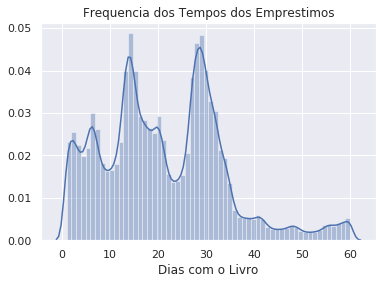

In [229]:
g = sns.distplot(to_plot["Dias com o Livro"], bins=60)
g.set_title("Frequencia dos Tempos dos Emprestimos")
#to_plot.plot.hist(x="Código de Barras", y="Dias com o Livro", bins=60, legend=False, title="Frequencia dos Tempos dos Emprestimos ")

In [34]:
livros_mais_dias = emprestimos_reg_sistema_sorted.groupby("registro_sistema")["dias_com_livro"].sum()

In [168]:
acervo_basic = exemplares_acervo[["registro_sistema", "titulo", "sub_titulo", "assunto"]]
exemplares_acervo[exemplares_acervo.registro_sistema == 162354]

,registro_sistema,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
128528,162354,Fundamentos de física /,NaN,Física.#$&Termodinâmica.#$&Física moderna.#$&O...,"Halliday, David,",Livro,395,c2009.,8. ed. -,"LTC,",9788521616054#$&9788521616061#$&9788521616085,NaN


In [36]:
livros_mais_dias = pd.DataFrame(livros_mais_dias.sort_values(ascending=False))
livros_mais_dias = livros_mais_dias.reset_index()

In [37]:
livros_mais_dias.columns = ["registro_sistema", "dias_com_livro"]

In [38]:
livros_interessantes = pd.merge(livros_mais_dias, acervo_basic, on="registro_sistema")

In [39]:
livros_interessantes = livros_interessantes[livros_interessantes.dias_com_livro > 0]

In [40]:
livros_interessantes_plot = livros_interessantes[["titulo", "dias_com_livro"]]

In [41]:
livros_interessantes_plot_d = livros_interessantes_plot.drop_duplicates("titulo")

In [95]:
livros_interessantes_plot_d.columns = ["Titulo", "Dias com o Livro"]

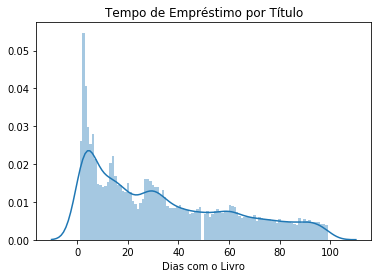

In [223]:
g = sns.distplot(livros_interessantes_plot_d[livros_interessantes_plot_d["Dias com o Livro"] < 100]["Dias com o Livro"], bins=100)
g.set_title("Tempo de Empréstimo por Título")
#livros_interessantes_plot_d[(livros_interessantes_plot_d["Dias com o Livro"] <= 100)].plot.hist(bins=100, figsize=(10,6), title = "Tempo de Empréstimo por Título")
plt.show()

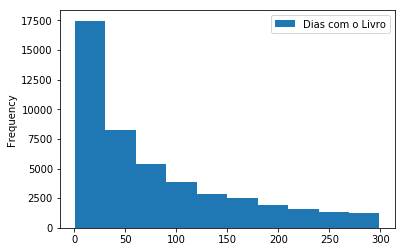

In [220]:
#sns.distplot(livros_interessantes_plot_d[livros_interessantes_plot_d["Dias com o Livro"] < 300]["Dias com o Livro"])
livros_interessantes_plot_d[livros_interessantes_plot_d["Dias com o Livro"] < 300].plot.hist()

In [62]:
livros_25 = livros_interessantes_plot_d.set_index("titulo").head(25)

In [162]:
livros_25["Anos com o Livro"] = livros_25.dias_com_livro/365

In [181]:
livros_25 = livros_25.reset_index()

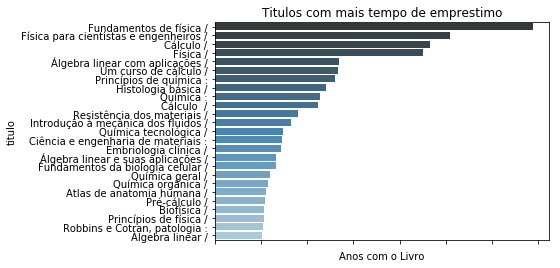

In [206]:
g = sns.barplot(data=livros_25, x="Anos com o Livro", y="titulo", palette="Blues_d")
g.set_title("Titulos com mais tempo de emprestimo")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()